<style type="text/css">
ol {
  counter-reset: item
}
li {
  display: block
}
li:before {
  content: counters(item, ".") " ";
  counter-increment: item
}
</style>
# Deep Learning

<hr>

#### Prof. Dr. Fabian Transchel - Hochschule Harz
#### Stand: 24.02.2022

<hr>

## Labor/Übung 1 - Erweiterung der ersten Inhalte aus dem ersten Block

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
<b>Aufgabe 0: Vorarbeit</b>
    <ol>
        <li>Erzeugen Sie ein Anaconda-Environment, das eine lauffähige <b>tensorflow</b>-Umgebung in der Version $\geq$ 2.8 und <b>numpy</b> umfasst.</li>
    </ol>
</div>

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
<b>Aufgabe 1: Tensorarithmetik</b>
    <br><br>
    Im ersten Vorlesungsblock wurde der <b>Epsilon-Tensor</b> $\varepsilon_{ijk}$ eingeführt.
    <ol>
        <li>Stellen Sie das Levi-Cevita-Symbol als Tensor in geeigneter Weise als <b>numpy.array()</b> dar.</li>
        <li>Vergewissern Sie sich, dass <b>np.dot()</b> mit Tensoren zweiter Stufe korrekt funktioniert.</li>
        <li>Prüfen Sie <b>numerisch</b> <i>und</i> <b>algebraisch</b>, ob das Levi-Cevita-Symbol tatsächlich das Vektorprodukt abbildet.</li>
    </ol>
</div>

<div style="border:1px solid black; background-color: #fefeee; padding:15px;">
<b>Aufgabe 2: Regression mit Tensorflow</b>
    <ol>
        <li>Erzeugen Sie ein <b>Neuronales Netz</b> mit dem tensorflow-Framework, das die Beobachtungen $y = f(x)$ aus dem u.s. Codeblock schätzt.</li>
        <li>Erzeugen Sie eine <b>Lineare Regression</b>, das die Beobachtungen $y = f(x)$ aus dem u.s. Codeblock schätzt.</li>
        <li>Erzeugen Sie Plots der funktionalen Schätzungen gemeinsam mit dem Scatterplot der Beobachtungen</li>
        <li>Vergleichen Sie beide Modelle hinsichtlich: <b>Genauigkeit, Laufzeit, Komplexität</b></li>
    <li>Führen Sie für das KNN eine <b>Maximum Activation Analysis</b> durch. Lässt sich auflösen, welcher Knoten wofür zuständig ist?</li>
    <li><i>Bonus</i>: Vergleichen Sie beide Modelle mittels der <b>shap</b>-Biliothek.</li>
    </ol>
</div>

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

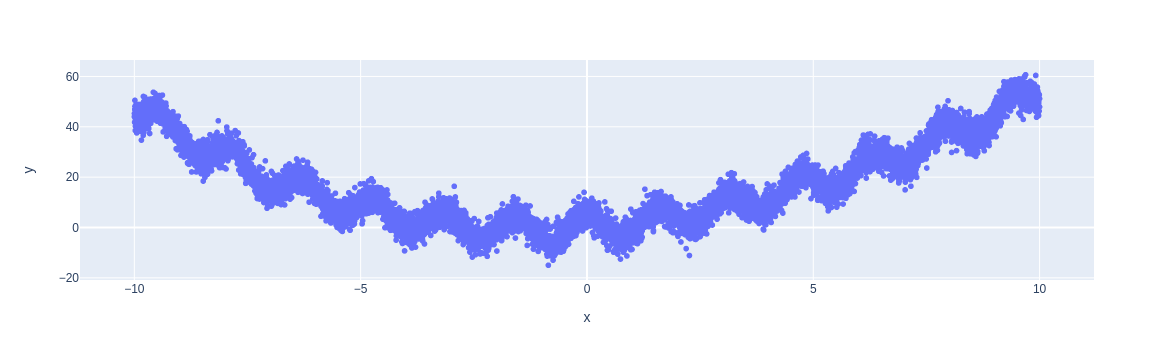

In [8]:
import numpy as np
f = lambda x:5*np.sin(x*0.25) + 0.5*x**2 + 5*np.cos(4*x) + np.random.normal(0,3,1)
x = np.random.uniform(-10,10,10000)
y = np.ravel(list(map(f,x)))
px.scatter(y,x,y)

In [9]:
data = {"x" : x, "y" : y}
df_func = pd.DataFrame(data=data)
df_func

,x,y
0,-4.055840,1.411509
1,-7.578831,24.457696
2,2.835895,7.481897
3,-8.082305,32.510461
4,7.655953,39.704389
...,...,...
9995,-3.678712,2.943981
9996,6.093695,27.326561
9997,-8.274497,36.081789
9998,1.808351,8.607448


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [39]:
tf.random.set_seed(42)

knn = tf.keras.Sequential([tf.keras.layers.Dense(16, activation = 'selu'),
                           tf.keras.layers.Dense(8, activation = 'selu'),
                           tf.keras.layers.Dense(4, activation = 'selu'),
                           tf.keras.layers.Dense(2, activation = 'selu'),
                           tf.keras.layers.Dense(4, activation = 'selu'),
                           tf.keras.layers.Dense(8, activation = 'selu'),
                           tf.keras.layers.Dense(16, activation = 'selu'),
                               tf.keras.layers.Dense(1, activation = None)])

knn.compile(loss = tf.keras.losses.MeanSquaredError(), 
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mse'])

knn.fit(X_train, Y_train, epochs = 250, verbose = 1)

Epoch 1/250
250/250 [==============================] - 1s 2ms/step - loss: 82.3148 - mse: 82.3148
Epoch 2/250
250/250 [==============================] - 0s 2ms/step - loss: 27.1176 - mse: 27.1176
Epoch 3/250
250/250 [==============================] - 0s 2ms/step - loss: 24.2856 - mse: 24.2856
Epoch 4/250
250/250 [==============================] - 0s 2ms/step - loss: 25.6126 - mse: 25.6126
Epoch 5/250
250/250 [==============================] - 0s 2ms/step - loss: 24.2052 - mse: 24.2052
Epoch 6/250
250/250 [==============================] - 0s 2ms/step - loss: 24.6590 - mse: 24.6590
Epoch 7/250
250/250 [==============================] - 0s 2ms/step - loss: 23.8341 - mse: 23.8341
Epoch 8/250
250/250 [==============================] - 0s 2ms/step - loss: 24.2238 - mse: 24.2238
Epoch 9/250
250/250 [==============================] - 0s 2ms/step - loss: 23.3895 - mse: 23.3895
Epoch 10/250
250/250 [==============================] - 0s 2ms/step - loss: 23.6971 - mse: 23.6971
Epoch 11/250
250/25

In [40]:
knn.evaluate(X_train, Y_train)

250/250 [==============================] - 0s 1ms/step - loss: 11.5597 - mse: 11.5597


[11.55969524383545, 11.55969524383545]

In [41]:
activations = knn.predict(X_test)
y_pred = np.zeros(len(X_test))
for i in range(len(y_pred)):
    y_pred[i] = activations[i][0]

df_pred = pd.DataFrame(data = {"x": X_test, "y": y_pred})
df_pred

,x,y
0,-2.273779,-0.943806
1,-1.374459,-0.023571
2,1.967625,5.158871
3,8.592520,37.933128
4,3.805675,8.649921
...,...,...
1995,1.462335,5.334742
1996,-3.956954,1.763287
1997,4.193790,8.074837
1998,8.310799,38.750057


In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1), Y_train)

LinearRegression()

In [43]:
y_lin_pred = lin_reg.predict(X_test.reshape(-1,1))
print("R2-score: " +str(lin_reg.score(y_pred.reshape(-1,1), Y_test.reshape(-1,1))))

R2-score: 0.39205198784552275


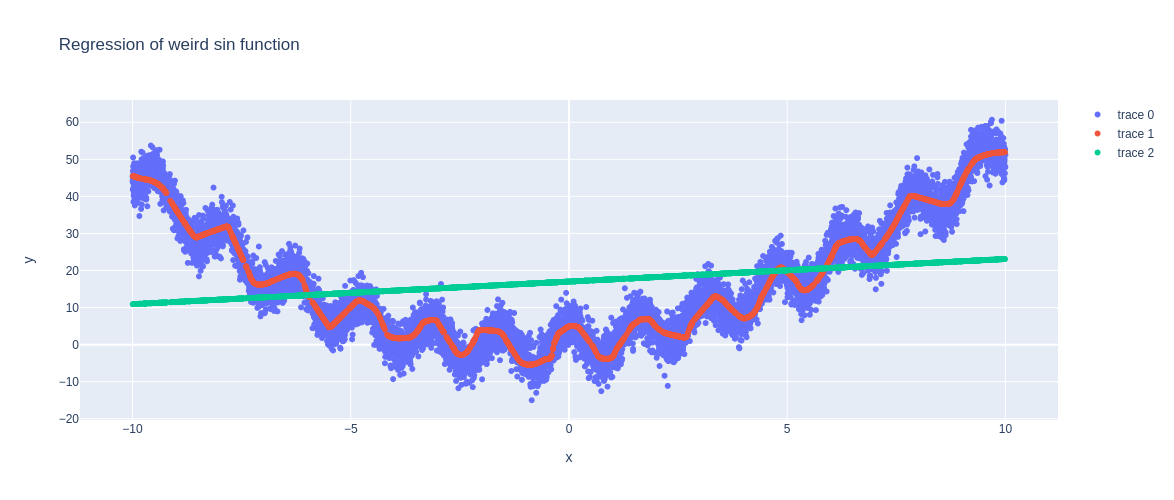

In [44]:
df_lin_pred = pd.DataFrame({"x":X_test, "y": y_lin_pred})

fig = make_subplots(rows = 1, cols=1)
fig.add_trace(go.Scatter(x = df_func["x"], y = df_func["y"], mode = "markers"))
fig.add_trace(go.Scatter(x=df_pred["x"], y=df_pred["y"], mode = "markers"))
fig.add_trace(go.Scatter(x=df_lin_pred["x"], y=df_lin_pred["y"], mode = "markers"))
fig.update_layout(title = "Regression of weird sin function", xaxis_title="x",yaxis_title="y",width=800,height=500)
fig.show()

## Geanuigkeit der Modelle

In [45]:
knn_mse = mse(df_pred["y"], Y_test)
knn_r2 = r2_score(df_pred["y"], Y_test)

lin_mse = mse(df_lin_pred["y"], Y_test)
lin_r2 = r2_score(df_lin_pred["y"], Y_test)

print("+++ MSE +++")
print("KNN: " + str(knn_mse))
print("LinReg: " + str(lin_mse))
print()
print("+++ R2-Score +++")
print("KNN: " + str(knn_r2))
print("LinReg: " + str(lin_r2))

+++ MSE +++
KNN: 11.58437134683141
LinReg: 252.0031682896394

+++ R2-Score +++
KNN: 0.9534481429955641
LinReg: -19.66924197078459


## Maximum Activation Analysis

In [46]:
from keras import models

layer_outputs = [layer.output for layer in knn.layers]
activation_model = models.Model(inputs=knn.input, outputs=layer_outputs)

activations = activation_model.predict(X_train)

first_layer_activation = activations[0]
second_layer_activation = activations[1]
third_layer_activation = activations[2]
fourth_layer_activation = activations[3]
fifth_layer_activation = activations[4]
sixth_layer_activation = activations[5]
seventh_layer_activation = activations[6]
eight_layer_activation = activations[7]

In [47]:
first_layer_coordinates = np.array(list(zip([1]*len(first_layer_activation[0]),list(range(len(first_layer_activation[0]))))))
second_layer_coordinates = np.array(list(zip([2]*len(second_layer_activation[0]),list(range(len(second_layer_activation[0]))))))
third_layer_coordinates =  np.array(list(zip([3]*len(third_layer_activation[0]),list(range(len(third_layer_activation[0]))))))
fourth_layer_coordinates = np.array(list(zip([4]*len(fourth_layer_activation[0]),list(range(len(fourth_layer_activation[0]))))))
fifth_layer_coordinates = np.array(list(zip([5]*len(fifth_layer_activation[0]),list(range(len(fifth_layer_activation[0]))))))
six_layer_coordinates = np.array(list(zip([6]*len(sixth_layer_activation[0]),list(range(len(sixth_layer_activation[0]))))))
seventh_layer_coordinates = np.array(list(zip([7]*len(seventh_layer_activation[0]),list(range(len(seventh_layer_activation[0]))))))
eight_layer_coordinates = np.array(list(zip([8]*len(eight_layer_activation[0]),list(range(len(eight_layer_activation[0]))))))
all_coordinates = np.array([*first_layer_coordinates,*second_layer_coordinates,*third_layer_coordinates,*fourth_layer_coordinates,
                           *fifth_layer_coordinates, *six_layer_coordinates, *seventh_layer_coordinates, *eight_layer_coordinates])
all_coordinates

array([[ 1,  0],
       [ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 1, 13],
       [ 1, 14],
       [ 1, 15],
       [ 2,  0],
       [ 2,  1],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 3,  0],
       [ 3,  1],
       [ 3,  2],
       [ 3,  3],
       [ 4,  0],
       [ 4,  1],
       [ 5,  0],
       [ 5,  1],
       [ 5,  2],
       [ 5,  3],
       [ 6,  0],
       [ 6,  1],
       [ 6,  2],
       [ 6,  3],
       [ 6,  4],
       [ 6,  5],
       [ 6,  6],
       [ 6,  7],
       [ 7,  0],
       [ 7,  1],
       [ 7,  2],
       [ 7,  3],
       [ 7,  4],
       [ 7,  5],
       [ 7,  6],
       [ 7,  7],
       [ 7,  8],
       [ 7,  9],
       [ 7, 10],
       [ 7, 11],
       [ 7, 12],
       [ 7, 13],
       [ 7, 14],
       [ 7, 15],
       [ 8,  0

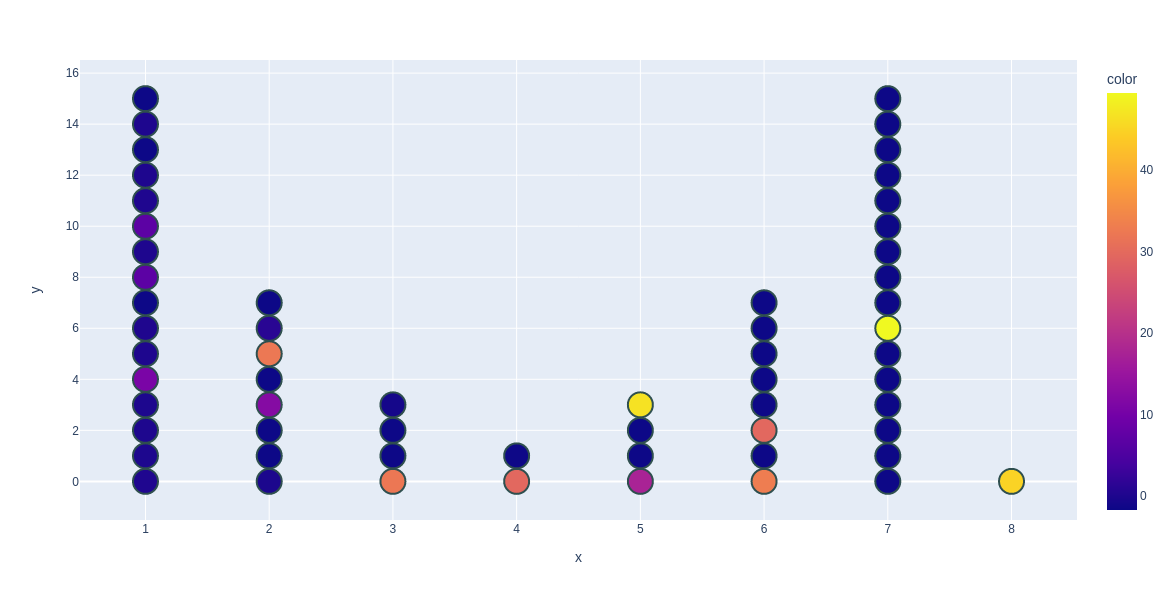

In [48]:
observation_index = 80
all_activations = np.array([*first_layer_activation[observation_index],*second_layer_activation[observation_index],*third_layer_activation[observation_index],
                           *fourth_layer_activation[observation_index],*fifth_layer_activation[observation_index],*sixth_layer_activation[observation_index],
                           *seventh_layer_activation[observation_index],*eight_layer_activation[observation_index]])
fig = px.scatter(all_coordinates,x=all_coordinates[:,0],y=all_coordinates[:,1],color=all_activations, width=1200,height=600)
fig.update_traces(marker=dict(size=25,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

## SHAP

In [21]:
import shap
shap.initjs()

In [34]:
explainer_knn = shap.DeepExplainer(knn, X_test)
shap_values_knn = explainer_knn.shap_values(X_test)

ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=2, found ndim=1. Full shape received: (2000,)

In [33]:
masker = shap.maskers.Independent(data = X_test.reshape(-1,1))
explainer_lin = shap.LinearExplainer(masker = masker, model = lin_reg)
shap_values_lin = explainer_lin.shap_values(X_test)

In [37]:
shap.dependence_plot("x", shap_values_lin, X_test)

IndexError: tuple index out of range

## FFT des KNN Preds

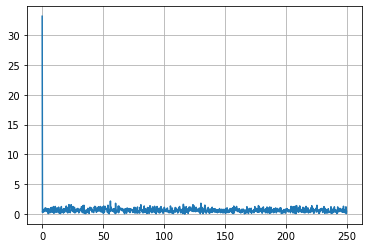

In [54]:
from scipy.fft import fft, fftfreq
grid = len(df_pred)
T = 20/10000
yf = fft(y_pred)
xf = fftfreq(grid, T)[:grid//2]
plt.plot(xf, 2.0/grid * np.abs(yf[0:grid//2]))
plt.grid()
plt.show()